**Name:** <span style="color:red">Melitza Hesseling, Alessandro Giulivo</span>

# SYSTEMS AND NETWORK BIOLOGY - PRACTICAL 5
# Robustness of gene regulatory networks

---

To submit your report, answer the questions below and save the *notebook* clicking on `File > Download as > iPython Notebook` in the menu at the top of the page. **Rename the notebook file** to ''`practicalN_name1_name2.ipynb`'', where `N` is the number of the practical, and `name1` and `name2` are the first surnames of the two team members (only one name if the report is sent individually). Finally, **submit the resulting file through the *Aul@-ESCI***.

Remember to label the axes in all the plots.

*IMPORTANT REMINDER: Before the final submission, remember to **reset the kernel** and re-run the whole notebook again to check that it works.*

---

In this session we will study two publicly available biological networks. We will assess their robustness to attacks. To that end we will use the Python package `NetworkX`.

# 0. NetworkX instructions

These are the main `NetworkX` instructions that you will need to use in this practical:

*   `<graph>.to_undirected()` returns an undirected graph representation of the `<graph>` directed graph object. This allows to use some of the Networkx methods that only work with undirected graphs.

*   `<graph_copy> = <graph>.copy()` returns a copy of the `<graph>` graph object. 

*   `<graph>.number_of_nodes()` returns the number of nodes of the `<graph>` object.

*   `<graph>.number_of_edges()` returns the number of edges of the `<graph>` object.

*   `<graph>.nodes()` returns a list with all the nodes in `<graph>`.

*   `networkx.adjacency_matrix(<graph>)` creates the adjacency matrix of a network. The matrix is produced in the `SciPy` sparse format. You should use the `todense` method of this data type to generate a `numpy` matrix.

*   `networkx.number_connected_components(<graph>)` returns the number of connected components of the undirected graph `<graph>`.

*   `networkx.connected_component_subgraphs(<graph>)` returns a list of the connected components in the undirected graph `<graph>`. The components are ordered from the largest to the smallest.

*   `<graph>.remove_node(<node>)` removes the node with name `<node>` from the `<graph>` graph.
*   `networkx.draw_networkx` draws the network. It is convenient to use the `pos` argument with the `spring_layout` function of NetworkX to position the nodes such that the network is not too tangled.

First, load all necessary Python modules (including NetworkX).

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# 1. Network analysis

There is a large number of databases of cellular regulatory networks (involving metabolic reactions, protein-protein interactions, gene regulation, ...). In this practical session we will work with transcription factor networks, which can usually be treated as directed simple graphs. We will the **RegulonDB** database, which contains most known gene regulatory interactions in _Escherichia coli_. To download the database, access the [RegulonDB website](http://regulondb.ccg.unam.mx/), then click **Downloads** and then **Experimental Datasets**. Finally, download the file labeled **TF - gene interactions**, and place it in the folder where you will be working.

To load the network you can use the following function:

In [2]:
def load_network(filepath):
    file_object = open(filepath, mode="r")       # open the file in reading (r) mode
    network_object = nx.DiGraph()                 # Create a directed graph object
    
    for line in file_object:                      # For each line in the file
        if line.startswith("#") or line == "\n":  # skip the line if it starts with #, or
                                                  # if it's empty ()
            continue
        line = line.lower().split()               # remove uppercase letters and
                                                  # split the line into words
        network_object.add_edge(line[0], line[1]) # add an edge going from the node specified
                                                  # in the first column to the
                                                  # one specified in the second column
    return network_object

Load the database into a graph object and calculate the number of genes (nodes), interactions (edges) and the mean degree.

In [3]:
G = load_network("network_tf_gene.txt")
print("Number of genes (nodes) = ", G.number_of_nodes())
print("Number of interactions (edges) = ", G.number_of_edges())
print("Mean degree = ", 2*G.number_of_edges()/G.number_of_nodes())

Number of genes (nodes) =  1909
Number of interactions (edges) =  4439
Mean degree =  4.650602409638554


---

<span style="color:blue">This gene regulatory network of E.Coli contains 1909 genes with 4439 interactions between them: so we are dealing with a very large network where each gene interacts on average with 4.65 other genes.</span>

---

How many _connected components_ (a set of vertices in a graph that are linked to each other by
paths) does the network have? Select the largest component of the network (save it to a new
graph) and repeat the calculations of number of nodes, number of edjes and mean degree. Draw this new subgraph.

Number of connected components = 27
Largest connected component:
Number of genes (nodes) =  1802
Number of interactions (edges) =  4328
Mean degree =  4.803551609322975


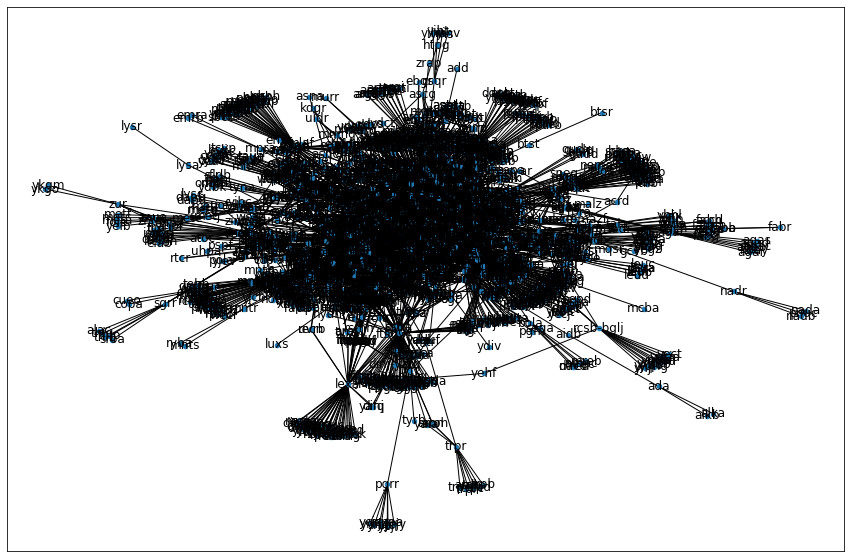

In [4]:
G_undirected = G.to_undirected()
print("Number of connected components =", nx.number_connected_components(G_undirected))
print("Largest connected component:")
largest = G_undirected.subgraph(max(nx.connected_components(G_undirected)))
print("Number of genes (nodes) = ", largest.number_of_nodes())
print("Number of interactions (edges) = ", largest.number_of_edges())
print("Mean degree = ", 2*largest.number_of_edges()/largest.number_of_nodes())
#pos = nx.spring_layout(largest)
plt.figure(figsize=(15, 10))
nx.draw_networkx(largest, node_size = 20)

---

<span style="color:blue">Of the 27 connected components in the network, the largest one contains the vast majority of both genes and interactions. The other 26 connected components only make up 5.6% of the nodes and 2.5% of the edges of the total network. The mean degree of the largest connected component is a little higher than for the total network.  
The graph shows the largest connected component: it has a lot of genes and interactions, so it's hard to identify individual genes, but it is pretty evident how there are specific genes that have interactions with a lot of other genes (they are called "hubs"). </span>

---

Next, create the adjacency matrix of the network, and use it to compute the degrees of all nodes and the average degree of the network. Print the average degree and plot the degree distribution of the network **(do NOT use specially dedicated functions of NetworkX for those tasks)**.

Average degree = 4.803551609322975


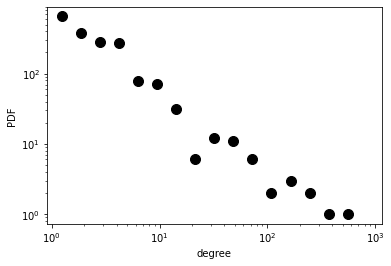

In [5]:
g = largest.to_undirected()
A = nx.adjacency_matrix(g)
A = A.todense()
print("Average degree =", (np.sum(A) + np.trace(A))/len(A)) ## taking the diagonal twice in order to count self loops twice (we are working with an undirected network)
degrees = np.sum(A, axis=1)
bins = np.logspace(0, 3, num = 18)
hist, bin_edges = np.histogram(degrees, bins)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
plt.plot(bin_centres, hist, '.', color = "black", markersize=20)
plt.yscale("log")
plt.xscale("log")
plt.ylabel("PDF")
plt.xlabel("degree")
plt.show()

---

<span style="color:blue">In this histogram we can see the "Probability Density Function" for the degrees of our largest connected component. The shape of this logarithmic distribution is linear, so we know we are dealing with a scale-free network. </span>

---

# 2. Robustness to failures

Different classes of networks react in different ways when some of their nodes disappear. Here we will study the robustness to random failures **using only the largest connected component of the RegulonDB network**. To do so, copy the largest connected component of the network into a new graph. Next remove iteratively 20 arbitrary (i.e. randomly chosen) nodes from this graph and check if its connectivity has changed: does it remain as a single connected component or does the failure break it apart into multiple sub-graphs?

**Note**: to select a random node use the function `randint` from the module `numpy.random`.

In [6]:
H2 = g.copy()
for i in range(20):
    H2_nodes = list(H2.nodes())
    n = np.random.randint(len(H2_nodes))
    H2.remove_node(H2_nodes[n])
    print("Failure of node", H2_nodes[n],
          "breaks the largest connected component into",
          nx.number_connected_components(H2), "portion(s)")

Failure of node phne breaks the largest connected component into 1 portion(s)
Failure of node fau breaks the largest connected component into 1 portion(s)
Failure of node fear breaks the largest connected component into 2 portion(s)
Failure of node cusa breaks the largest connected component into 2 portion(s)
Failure of node purt breaks the largest connected component into 2 portion(s)
Failure of node metk breaks the largest connected component into 2 portion(s)
Failure of node moae breaks the largest connected component into 2 portion(s)
Failure of node riba breaks the largest connected component into 2 portion(s)
Failure of node mntp breaks the largest connected component into 2 portion(s)
Failure of node gntr breaks the largest connected component into 2 portion(s)
Failure of node dpib breaks the largest connected component into 2 portion(s)
Failure of node rrfc breaks the largest connected component into 2 portion(s)
Failure of node ascb breaks the largest connected component into 

---

<span style="color:blue"> Here we see that random failures rarely break the largest connected component into many portions, so we can assume that the chance that a "hub" is targeted is pretty low (the amount of hubs is relatively small). Thus, we might say that the largest connected component seems to be robust to failures. So if a mutation arises on a random gene, it's unlikely to have a very large impact on the regulatory network of the cell. </span>

---

# 3. Sensitivity to attacks

We now study the effect of directed attacks, namely removal of the most important nodes of the network, and see how they affect its connectivity. Although there is a variety of ways to measure the importance of a node, for the sake of simplicity we will restrict ourselves to using the degree.

Using the `sorted` function in Python, list the 10 nodes with highest degree.

In [7]:
g_nodes = list(g.nodes())
d = dict(zip(g_nodes, degrees))
sorted_d = sorted(d.items(), key=lambda x : x[1])[::-1]
l = []
for k in sorted_d[:10]:
    l.append(k[0])
print(l)

['crp', 'fnr', 'fis', 'ihf', 'h-ns', 'arca', 'fur', 'narl', 'lrp', 'nsrr']


Generate a new copy of the largest component of the network as you did above. Remove iteratively the 10 nodes with highest degree of the network and check how the connectivity changes.

In [8]:
H3 = g.copy()
for node in l:
    H3.remove_node(node)
    print("Attacking node", node,
          "breaks the largest connected component into",
          nx.number_connected_components(H3), "portion(s)")

Attacking node crp breaks the largest connected component into 77 portion(s)
Attacking node fnr breaks the largest connected component into 107 portion(s)
Attacking node fis breaks the largest connected component into 171 portion(s)
Attacking node ihf breaks the largest connected component into 197 portion(s)
Attacking node h-ns breaks the largest connected component into 217 portion(s)
Attacking node arca breaks the largest connected component into 242 portion(s)
Attacking node fur breaks the largest connected component into 290 portion(s)
Attacking node narl breaks the largest connected component into 332 portion(s)
Attacking node lrp breaks the largest connected component into 396 portion(s)
Attacking node nsrr breaks the largest connected component into 432 portion(s)


---

<span style="color:blue"> Removing the nodes with the highest degree (the hubs) breaks the largest connected components into a lot of portions. So if a specific gene with a lot of interactions is targeted, the whole regulatory network can be disrupted: the consequences for our organism will be severe. </span>

---